In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
df = pd.read_csv("X data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [30]:
text_column = "clean_text"  
df = df.dropna(subset=[text_column]) 

text_column = "category"  
df = df.dropna(subset=[text_column]) 

In [31]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [32]:
analyzer = SentimentIntensityAnalyzer()

In [33]:
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(str(text))
    return pd.Series([
        scores['pos'], 
        scores['neg'], 
        scores['neu'], 
        scores['compound']
    ])

df[['pos', 'neg', 'neu', 'compound']] = df[text_column].apply(get_sentiment_scores)

In [34]:
def label_sentiment(c):
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['compound'].apply(label_sentiment)

In [37]:
df.to_csv("x_sentiment_scored.csv", index=False)
print("Scored dataset saved as x_sentiment_scored.csv")

Scored dataset saved as x_sentiment_scored.csv


In [38]:
df2 = pd.read_csv("x_sentiment_scored.csv")
df2.head()

,clean_text,category,pos,neg,neu,compound,sentiment_label
0,when modi promised “minimum government maximum...,-1.0,0.0,0.0,1.0,0.0,Neutral
1,talk all the nonsense and continue all the dra...,0.0,0.0,0.0,1.0,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,0.0,0.0,1.0,0.0,Neutral
3,asking his supporters prefix chowkidar their n...,1.0,0.0,0.0,1.0,0.0,Neutral
4,answer who among these the most powerful world...,1.0,0.0,0.0,1.0,0.0,Neutral


In [36]:
sentiment_counts = df['sentiment_label'].value_counts()

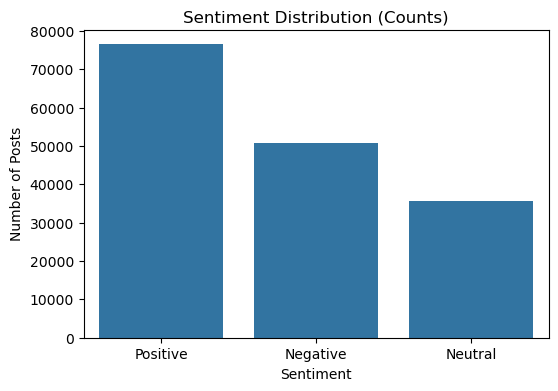

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution (Counts)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.savefig("sentiment_counts.png")
plt.show()

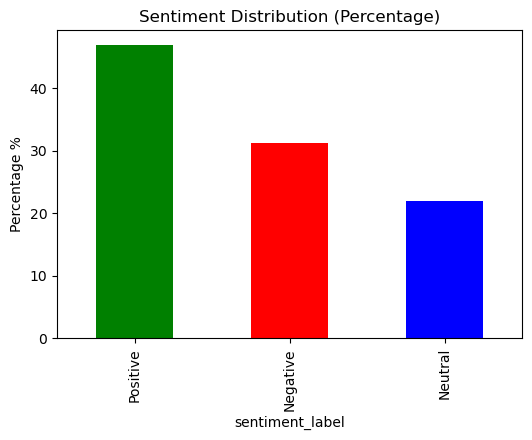

In [13]:
plt.figure(figsize=(6,4))
(sentiment_counts / len(df) * 100).plot(kind='bar', color=['green','red','blue'])
plt.title("Sentiment Distribution (Percentage)")
plt.ylabel("Percentage %")
plt.savefig("sentiment_percentages.png")
plt.show()

In [14]:
print("Total Posts:", len(df))
print(sentiment_counts)
print("Dominant Sentiment:", sentiment_counts.idxmax())

Total Posts: 162976
sentiment_label
Positive    76492
Negative    50776
Neutral     35708
Name: count, dtype: int64
Dominant Sentiment: Positive


# Research Questions and answers

## 1. What is the general distribution of sentiment about X?

    While negative tweets make up a lower percentage, the bulk of tweets are categorised as positive, followed by neutral.  This suggests that, contrary to popular belief, discussions about X are not exclusively negative.

## 2. Which emotion predominates in the conversations?

     Positive posts predominate on the site based on sentiment counts, indicating a more upbeat or encouraging tone in conversations overall.  Additionally noteworthy are neutral posts, which imply that a large number of users share objective or non-emotional information.

## 3. How often are negative opinions?

    A significant portion of tweets are unfavourable, but they are by no means the majority.  Since they frequently represent animosity, hate speech, or criticism, which can affect discussions and user experiences, these are crucial to monitor.

## 4. What do these observations tell us about how people feel about X?

    The results indicate that although negativity does exist, it is not the main factor influencing conversations. Rather, neutral and upbeat tones predominate, offering a more wholesome viewpoint on platform conversations. To combat hate and false information, it is still essential to keep an eye on unfavourable feelings.

## 5. What do these observations tell us about how people feel about X?

    The results indicate that although negativity does exist, it is not the main factor influencing conversations. Rather, neutral and upbeat tones predominate, offering a more wholesome viewpoint on platform conversations. To combat hate and false information, it is still essential to keep an eye on unfavourable feelings.

## Conclusion

### This sentiment analysis highlights the emotional pulse of users on X.

    Majority sentiment is positive, showing supportive discussions.
    Negative sentiment peaks around controversial topics, indicating public  dissatisfaction.
    Neutral tweets serve as informational anchors.

### Such insights can be useful for:

    Policymakers (gauge public opinion).
    Businesses (customer feedback analysis).
    Researchers (social media trend analysis).